# Import library

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# Check version of sklearn library
import sklearn
print(sklearn.__version__)

0.23.2


# Explore wine dataset

In [4]:
data = pd.read_csv('/Users/ngocnguyen/Dropbox/Mac/Desktop/python_file/kaggel/input/WineQT.csv')
df = data.copy()
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
(1143, 13)


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
df.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7


In [8]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [9]:
# reorder column names
df = df[['Id', 'fixed acidity', 'volatile acidity','citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality' ]]

<AxesSubplot:>

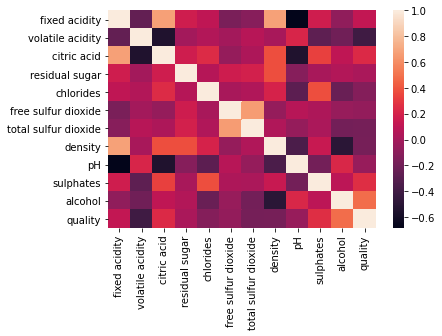

In [10]:
# explore correlation between features
sns.heatmap(df.iloc[:, 1:13].corr())

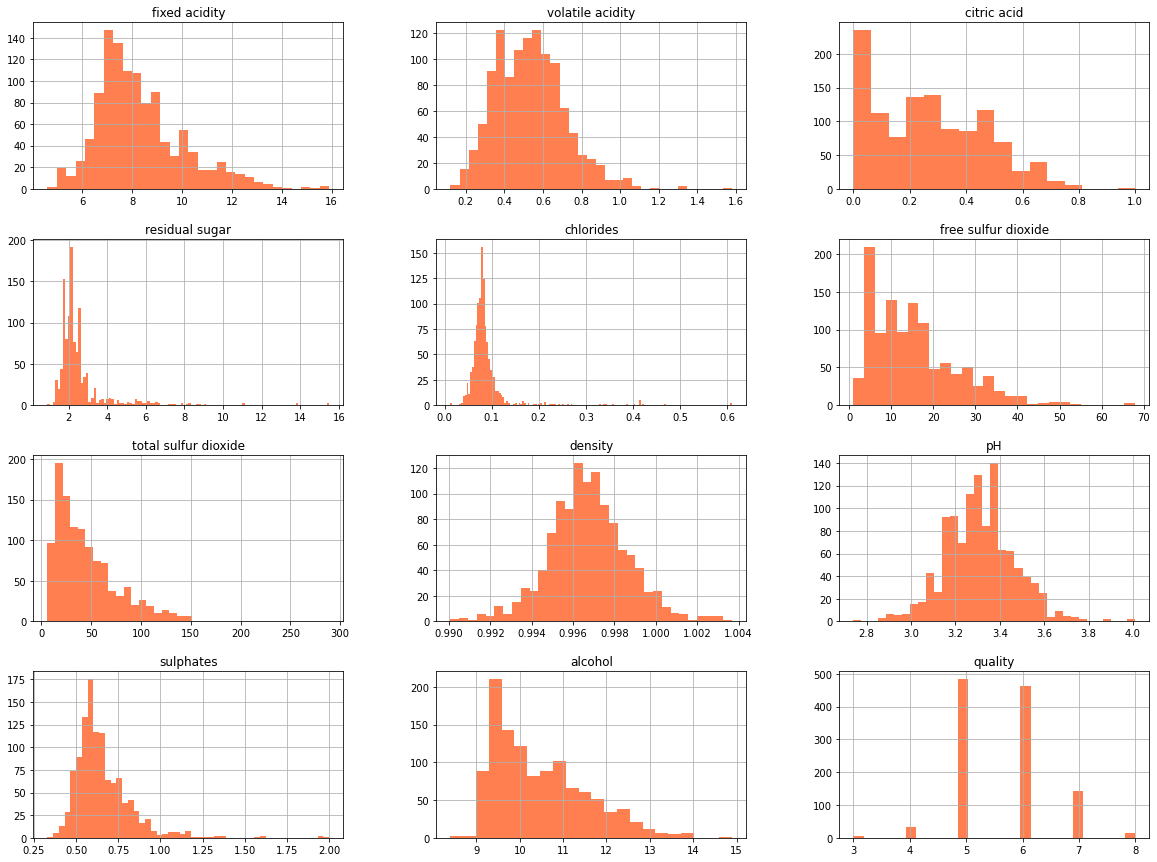

In [11]:
# explore the distribution of features
df.iloc[:,1:13].hist(figsize=(20,15),bins='auto', color='coral')
plt.show()

Text(0.5, 0, 'Skewness')

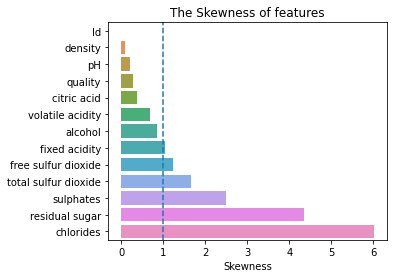

In [12]:
# plot the skewness of features
plt.figure(figsize=(5,4))
skewness=df.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index).set_title('The Skewness of features')
plt.axvline(x=1, linestyle='--')
plt.xlabel('Skewness')

In [13]:
# log features which have highly skewed distribution
df['total sulfur dioxide']=df['total sulfur dioxide'].apply(np.log)
df['sulphates']=df['sulphates'].apply(np.log)
df['chlorides']=df['chlorides'].apply(np.log)
df['residual sugar']=df['residual sugar'].apply(np.log)
df['free sulfur dioxide']=df['free sulfur dioxide'].apply(np.log)
df['fixed acidity']=df['fixed acidity'].apply(np.log)

In [14]:
# check values of target variable
df[['quality']].value_counts()

quality
5          483
6          462
7          143
4           33
8           16
3            6
dtype: int64

In [15]:
X = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values

In [16]:
#Do oversampling by Smote method
strategy={4:350,7:350,8:350}
oversample = SMOTE(sampling_strategy={3:470, 8:470, 4:470, 7:470})
X, y = oversample.fit_resample(X, y)

In [17]:
print(X.shape)
print(y.shape)

(2825, 12)
(2825,)


In [18]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [19]:
# scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random forest with gridsearch

In [20]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 1000]
}
# Create a based model
rf =RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [21]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 10.5min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

In [22]:
# create function to calculate the accurancy of prediction
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [23]:
# Evaluate model performance in test set
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


Model Performance
Average Error: 0.2000 degrees.
Accuracy = 96.52%.


# Random forest without grid search

In [24]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = rf.score(X_test, y_test)
print("The training accuracy:", rf.score(X_train, y_train)*100, "%")
print("The testing accuracy:", rf_acc * 100, "%")


The training accuracy: 100.0 %
The testing accuracy: 83.71681415929203 %


# Gradient boosting without cross validation

In [25]:
# Gradient boosting without cross validation
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = gb.score(X_test, y_test)
print("The training mean accuracy for gradient boosting classifier is:", gb.score(X_train, y_train)*100, "%")
print("The testing mean accuracy for gradient boosting classifer is:", gb_acc * 100, "%")

The training mean accuracy for gradient boosting classifier is: 95.39823008849557 %
The testing mean accuracy for gradient boosting classifer is: 81.59292035398231 %


# Gradient boosting without cross validation

In [26]:
# evaluate gradient boosting algorithm for classification
# define the model
gbt = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)
# evaluate the model on the dataset
n_scores = cross_val_score(gbt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.817 (0.023)
